In [141]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from generate_data import SyntheticDataset

In [3]:
from model import GolemTS
from generate_data import SyntheticDataset
import numpy as np


In [4]:
import torch

In [5]:
A_init = np.random.randn(4, 2)
dag_obj = SyntheticDataset(1000, 2, 1, B_scale=1.0, graph_type='ER', degree=2, A_scale=1.0, noise_type='NV')
model = GolemTS(n=1000, d=2, p=1, Y=dag_obj.Y, lambda_1=2e-2, lambda_2=2.0, A_init=dag_obj.A, ev=False, lr=6e-3)

In [6]:
#model.ev = False#

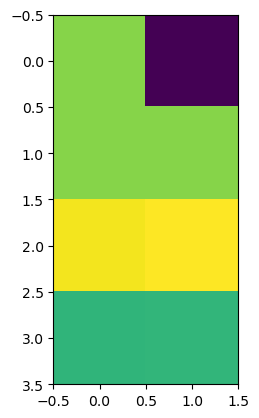

In [27]:
plt.imshow(dag_obj.A)

In [7]:
import trainer

In [8]:
likes, evs = trainer.train(model, dag_obj.Y, epochs=40_000, warmup_epochs=0)

likelihood: -15.88505744934082
tensor([[-0.8882,  0.3173],
        [ 0.6945, -0.2415],
        [-1.1891,  0.5612],
        [ 0.9445, -0.3336]])
likelihood: -16.073081970214844
tensor([[ 0.6576, -0.2910],
        [-1.0854,  0.5732],
        [ 0.2626, -0.1629],
        [ 0.3326, -0.1146]])
likelihood: -16.052114486694336
tensor([[ 0.3234, -0.0521],
        [-0.3386,  0.1626],
        [ 0.1955, -0.0957],
        [ 0.4787, -0.1565]])
likelihood: -16.284683227539062
tensor([[-0.1391,  0.1575],
        [ 0.3675, -0.1866],
        [-0.6765,  0.2954],
        [ 0.1856, -0.0064]])
likelihood: -16.18739128112793
tensor([[ 0.0191,  0.0862],
        [-0.0341, -0.0722],
        [-0.3138,  0.1190],
        [ 0.2170, -0.0853]])
likelihood: -16.362415313720703
tensor([[ 0.0881, -0.0048],
        [ 0.1234,  0.0190],
        [-0.1988,  0.1179],
        [-0.0029,  0.0408]])
likelihood: -16.65298843383789
tensor([[ 0.0949,  0.0790],
        [-0.2117, -0.0663],
        [-0.2867,  0.1214],
        [ 0.0423,

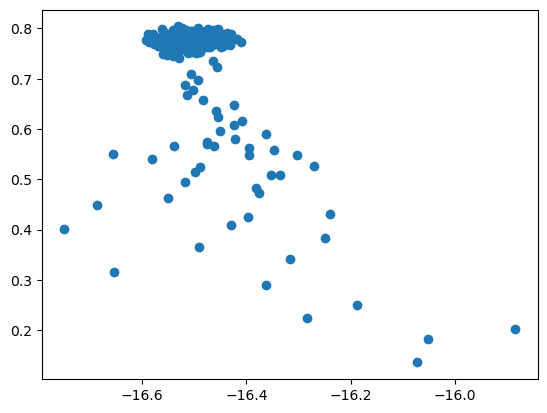

In [9]:
plt.scatter(likes, evs)

In [28]:
evs[150:170]

[array(0.7863497, dtype=float32),
 array(0.796495, dtype=float32),
 array(0.7692375, dtype=float32),
 array(0.7782506, dtype=float32),
 array(0.7701007, dtype=float32),
 array(0.76716524, dtype=float32),
 array(0.7889908, dtype=float32),
 array(0.7760819, dtype=float32),
 array(0.79075193, dtype=float32),
 array(0.77667224, dtype=float32),
 array(0.7698476, dtype=float32),
 array(0.7816317, dtype=float32),
 array(0.77174646, dtype=float32),
 array(0.7761892, dtype=float32),
 array(0.7796535, dtype=float32),
 array(0.7727342, dtype=float32),
 array(0.7665958, dtype=float32),
 array(0.7700803, dtype=float32),
 array(0.7753497, dtype=float32),
 array(0.7756022, dtype=float32)]

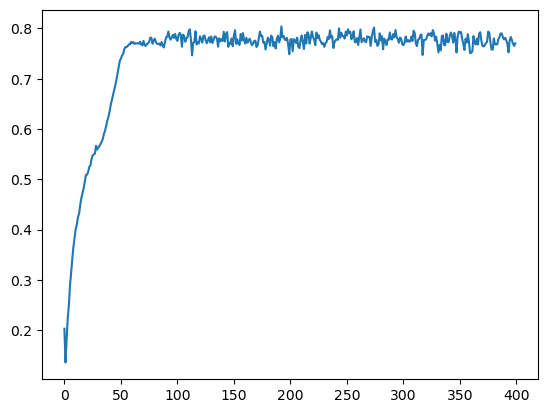

In [29]:
plt.plot(evs)

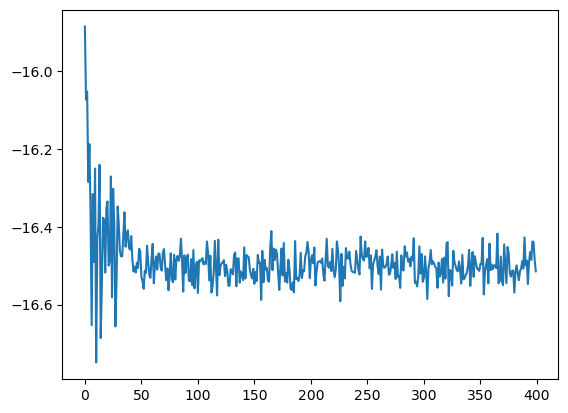

In [30]:
plt.plot(likes)

In [31]:
model_A = model.A.detach().numpy().copy()
model_A[np.abs(model_A) < 0.05] = 0.0

In [32]:
model_A

array([[ 0.       , -2.131637 ],
       [ 0.       ,  0.       ],
       [ 0.       ,  0.735044 ],
       [-2.4556372, -0.2966361]], dtype=float32)

In [33]:
dag_obj.A

array([[ 0.        , -1.64586653],
       [ 0.        ,  0.        ],
       [ 0.33725204,  0.36911215],
       [-0.32935118, -0.31846772]])

In [34]:
A_init

array([[ 0.46965847, -1.01305095],
       [-0.18476539, -0.73341651],
       [ 0.28201586, -0.46889178],
       [-0.39782262, -1.47467134]])

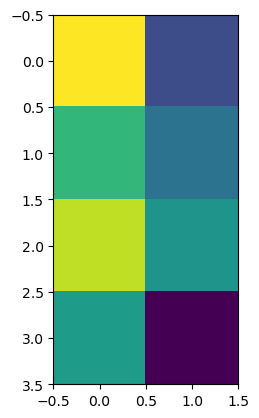

In [35]:
plt.imshow(A_init)

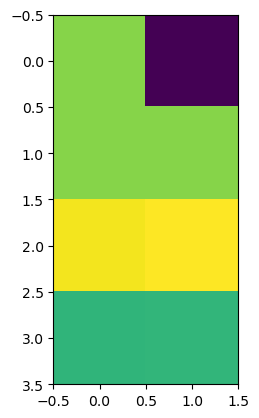

In [36]:
plt.imshow(dag_obj.A)

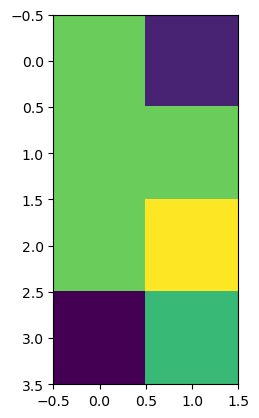

In [37]:
plt.imshow(model_A)

In [187]:
np.linalg.cond(pinv(A_init.T) @ pinv(A_init))

2.1476240866594045e+17

In [243]:
np.linalg.lstsq(dag_obj.Y, dag_obj.Z[:, :2], rcond=-1)

(array([[ 1.00000000e+00,  1.64586653e+00],
        [ 8.32667268e-17,  1.00000000e+00],
        [-3.37252042e-01, -3.69112145e-01],
        [ 3.29351178e-01,  3.18467719e-01]]),
 array([8.00571311e-28, 4.50588594e-27]),
 4,
 array([78.747085  , 38.96310177, 36.95819186, 18.10174118]))

In [241]:
lst = np.linalg.lstsq(dag_obj.Z[:, :2], dag_obj.Y, rcond=-1)
est = lst[0]
est

array([[ 1.02435953, -1.66111786,  0.0299188 , -0.04332565],
       [ 0.01174301,  0.99156647, -0.01072131, -0.04663349]])

In [242]:
lst

(array([[ 1.02435953, -1.66111786,  0.0299188 , -0.04332565],
        [ 0.01174301,  0.99156647, -0.01072131, -0.04663349]]),
 array([ 316.0252667 ,  119.7275427 , 1423.25888913, 1363.6590635 ]),
 2,
 array([42.21216658, 34.91198026]))

In [257]:
B

array([[ 0.65811567, -1.43477628, -0.48876143,  0.53756767],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515]])

In [261]:
(Binv @ Binv.T @ Binv) @ np.linalg.pinv(Binv @ Binv.T @ Binv) 

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [255]:
(Z @ Binv.T + model.U) @ np.linalg.inv(Binv @ B + np.eye(4)) 

TypeError: Concatenation operation is not implemented for NumPy arrays, use np.concatenate() instead. Please do not rely on this error; it may not be given on all Python implementations.

In [253]:
Binv @ B + np.eye(4)

2.0

In [240]:
B.T @ B

array([[ 0.44400099, -0.84668612, -0.30718974,  0.33555157],
       [-0.84668612,  2.93305923,  0.83097745, -0.93469018],
       [-0.30718974,  0.83097745,  0.25812869, -0.28698016],
       [ 0.33555157, -0.93469018, -0.28698016,  0.31951137]])

In [223]:
dag_obj.Z[:, :2] @ est

array([[-0.3648418 ,  1.63988803, -0.02213249, -0.03242432],
       [-0.07190704,  0.3823325 , -0.00500943, -0.00908976],
       [-0.72108878,  1.46740663, -0.02432447,  0.01689073],
       ...,
       [ 1.76619829, -2.74987999,  0.05033548, -0.07991621],
       [ 1.19831175, -1.24088798,  0.02731045, -0.08274538],
       [ 0.5454013 , -2.3098008 ,  0.03153485,  0.04200371]])

In [194]:
dag_obj.Y

array([[-0.92576794,  1.96060373, -1.41973959,  0.23956586],
       [ 0.05869093,  0.31980132,  0.6026762 ,  0.21664268],
       [-0.80784564,  1.54112596,  0.32026834,  0.63316752],
       ...,
       [ 1.33758703, -2.51862524, -1.33868745, -0.20087997],
       [ 0.93612462, -1.11533805, -1.19237113, -0.53561449],
       [ 0.93849423, -2.65006684, -1.67504012, -2.89904794]])

In [180]:
pinv(dag_obj.Y) @ (dag_obj.Y)

array([[ 1.00000000e+00, -1.23772520e-15, -5.95877514e-16,
        -1.84227633e-15],
       [ 1.01481323e-16,  1.00000000e+00, -4.85722573e-17,
        -7.33788030e-16],
       [ 5.20417043e-17, -2.08166817e-17,  1.00000000e+00,
        -3.46944695e-17],
       [ 7.63278329e-17,  3.46944695e-17, -2.45029691e-16,
         1.00000000e+00]])

In [101]:
Binv = (model.U - dag_obj.A).detach().numpy()
B = np.linalg.pinv(Binv)
B

array([[ 0.65811567, -1.43477628, -0.48876143,  0.53756767],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515]])

In [102]:
Bt = np.linalg.pinv(Binv.T)

In [103]:
Binv.T @ Bt

array([[ 1.00000000e+00, -2.54763330e-16],
       [ 1.16489034e-16,  1.00000000e+00]])

In [104]:
Binv.T @ B.T

array([[ 1.00000000e+00, -2.61114124e-17],
       [-2.08976430e-16,  1.00000000e+00]])

In [105]:
Binv[0, :] @ Binv[1, :]

1.6458665345720358

In [106]:
B @ B.T

array([[ 3.01956593, -1.43477628],
       [-1.43477628,  0.93513435]])

In [107]:
B @ Binv

array([[ 1.00000000e+00, -2.08976430e-16],
       [-2.61114124e-17,  1.00000000e+00]])

In [108]:
B @ B.T @ Binv

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

In [109]:
B @ B.T

array([[ 3.01956593, -1.43477628],
       [-1.43477628,  0.93513435]])

In [110]:
Binv.T @ np.linalg.pinv(Binv.T)

array([[ 1.00000000e+00, -2.54763330e-16],
       [ 1.16489034e-16,  1.00000000e+00]])

In [111]:
Binv @ B

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [112]:
B.T @ Binv.T

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [113]:
Binv @ B

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [114]:
pinv = np.linalg.pinv

In [169]:
np.linalg.cond(B.T @ B)

1.5058031270210723e+17

In [173]:
np.linalg.cond(Binv @ Binv.T)

7.68568672305837e+17

In [171]:
np.linalg.cond(B.T @ Binv.T)

4.757246005749757e+16

In [182]:
np.linalg.cond(B.T @ B)

1.5058031270210723e+17

In [183]:
np.linalg.cond(Binv @ Binv.T)

7.68568672305837e+17

In [184]:
np.linalg.cond(Binv @ B)

8.910816465645408e+16

In [176]:
np.linalg.cond(pinv(A_init).T @ pinv(A_init))

5.7250463082025656e+16

In [167]:
np.linalg.cond(B @ Binv)

1.0000000000000004

In [168]:
np.linalg.cond(Binv @ B)

8.910816465645408e+16

In [165]:
np.linalg.cond(Binv.T @ Binv)

18.386482161106727

In [181]:
np.linalg.cond(Binv.T @ B.T)

1.0000000000000004

In [177]:
Binv.T @ Binv

array([[1.22221114, 1.87523808],
       [1.87523808, 3.94654211]])

In [170]:
B @ B.T

array([[ 3.01956593, -1.43477628],
       [-1.43477628,  0.93513435]])

In [172]:
np.linalg.cond(Binv.T @ B.T)

1.0000000000000004

In [161]:
np.linalg.cond(B @ B.T)

18.386482161106755

In [115]:
A_init @ pinv(A_init)

array([[ 0.7679515 ,  0.0208411 ,  0.42135564,  0.01506882],
       [ 0.0208411 ,  0.19059966, -0.0119702 ,  0.392038  ],
       [ 0.42135564, -0.0119702 ,  0.23406987, -0.03996636],
       [ 0.01506882,  0.392038  , -0.03996636,  0.80737896]])

In [116]:
Binv[: 0] = 0

In [163]:
np.linalg.inv(B @ B.T) @  (B @ B.T)

array([[ 1.00000000e+00, -2.16647474e-17],
       [ 7.35130313e-18,  1.00000000e+00]])

In [145]:
Binv @ B 

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [146]:
B.T @ Binv.T

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [130]:
np.linalg.inv(B.T @ Binv.T)

array([[ 3.09599030e+16, -1.81892408e+16,  6.58021679e+16,
        -2.66220012e+16],
       [-1.96476870e+16,  1.15855374e+16, -4.07748230e+16,
         1.79027587e+16],
       [ 3.18884804e+16, -1.77504243e+16,  9.06654947e+16,
        -3.98163787e+15],
       [-6.13492502e+16,  3.70512535e+16, -1.06952842e+17,
         7.67545020e+16]])

In [120]:
Binv @ B

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [59]:
B.T @ Binv.T

array([[ 0.82982902,  0.10433006, -0.26046035,  0.24997693],
       [ 0.10433006,  0.93513435,  0.13871178, -0.17473515],
       [-0.26046035,  0.13871178,  0.11363559, -0.11679893],
       [ 0.24997693, -0.17473515, -0.11679893,  0.12140104]])

In [63]:
Binv @ Binv.T

array([[ 3.70887665,  1.64586653, -0.94476137,  0.85350654],
       [ 1.64586653,  1.        , -0.36911215,  0.31846772],
       [-0.94476137, -0.36911215,  0.24998272, -0.22862466],
       [ 0.85350654,  0.31846772, -0.22862466,  0.20989389]])

In [65]:
np.linalg.pinv(Binv.T @ B.T)

array([[ 1.0000000e+00, -2.0897643e-16],
       [ 2.0897643e-16,  1.0000000e+00]])

In [39]:
Z = dag_obj.Z[:, :2]

In [40]:
Z

array([[-0.36805656,  1.03725038],
       [-0.07321132,  0.26293736],
       [-0.70732233,  0.29494834],
       ...,
       [ 1.72290205,  0.1130165 ],
       [ 1.16184895,  0.69494088],
       [ 0.54860008, -1.41040613]])

In [41]:
dag_obj.Y

array([[-0.92576794,  1.96060373, -1.41973959,  0.23956586],
       [ 0.05869093,  0.31980132,  0.6026762 ,  0.21664268],
       [-0.80784564,  1.54112596,  0.32026834,  0.63316752],
       ...,
       [ 1.33758703, -2.51862524, -1.33868745, -0.20087997],
       [ 0.93612462, -1.11533805, -1.19237113, -0.53561449],
       [ 0.93849423, -2.65006684, -1.67504012, -2.89904794]])

In [42]:
Z @ B

array([[-0.1340074 ,  1.4980473 ,  0.3237707 , -0.37909941],
       [-0.02074925,  0.35092363,  0.07225538, -0.08530044],
       [-0.43472793,  1.29066562,  0.38662468, -0.43177146],
       ...,
       [ 1.14565985, -2.36629338, -0.82641134,  0.90642848],
       [ 0.83713422, -1.01713023, -0.47147046,  0.50314183],
       [ 0.21389455, -2.1060376 , -0.4637745 ,  0.54135719]])

In [43]:
(dag_obj.Y - (Z @ B))**2

array([[6.26884757e-01, 2.13958459e-01, 3.03982815e+00, 3.82746715e-01],
       [6.31074259e-03, 9.68598026e-04, 2.81346250e-01, 9.11696500e-02],
       [1.39216830e-01, 6.27303849e-02, 4.40316377e-03, 1.13409501e+00],
       ...,
       [3.68360425e-02, 2.32049952e-02, 2.62426810e-01, 1.22613201e+00],
       [9.79909844e-03, 9.64477503e-03, 5.19697773e-01, 1.07901469e+00],
       [5.25044697e-01, 2.95967815e-01, 1.46716440e+00, 1.18363875e+01]])

In [46]:
dag_obj.Y @ dag_obj.A + Z

array([[-0.92576794,  1.96060373],
       [ 0.05869093,  0.31980132],
       [-0.80784564,  1.54112596],
       ...,
       [ 1.33758703, -2.51862524],
       [ 0.93612462, -1.11533805],
       [ 0.93849423, -2.65006684]])

In [47]:
dag_obj.X

array([[-0.92576794,  1.96060373],
       [ 0.05869093,  0.31980132],
       [-0.80784564,  1.54112596],
       ...,
       [ 1.33758703, -2.51862524],
       [ 0.93612462, -1.11533805],
       [ 0.93849423, -2.65006684]])

In [44]:
model.A

Parameter containing:
tensor([[ 0.0040, -2.1316],
        [-0.0026,  0.0113],
        [ 0.0254,  0.7350],
        [-2.4556, -0.2966]], requires_grad=True)

In [21]:
np.cov(dag_obj.Z[:, :2].T)

array([[ 1.21608397, -0.03132528],
       [-0.03132528,  1.73169902]])

In [22]:
X = model.Y @ model.U
ya = model.Y @ model_A

In [23]:
np.mean(((X - ya)**2).detach().numpy(), axis=0)

array([8.858345 , 2.1058974], dtype=float32)

In [24]:
np.mean(((X - (model.Y  @ dag_obj.A))**2).detach().numpy(), axis=0)

array([1.21486789, 1.72996733])

In [25]:
model.Y.shape

torch.Size([1000, 4])

In [26]:
np.mean((X[:, 0] -model.Y  @ model_A[:,0]).detach().numpy()**2)

8.858348

In [27]:
np.mean((X[:, 0] -model.Y  @ dag_obj.A[:,0]).detach().numpy()**2)

1.2148678930710852

In [28]:
model_A[:,0]

array([0.       , 0.       , 0.       , 2.3289719], dtype=float32)

In [29]:
dag_obj.A[:,0]

array([0., 0., 0., 0.])

In [46]:
def _compute_likelihood(Y, A):
    with torch.no_grad():
        I = np.eye(4)
        ep = 1e-4
        Binv = model.U - A
        B = torch.pinverse(Binv)
            # print(self.A)
            # print(Binv)
            # print(self.Y @ Binv)
        omega = torch.diag(torch.diag((Y @ Binv).T @ (Y @ Binv))) / 1000
        print(B.T @ omega @ B)
        # print(Binv)
        print(omega)
            # print((self.Y @ Binv).T @ (self.Y @ Binv))
        # print(torch.det(B.T @ omega @ B + ep * I))
        # print(B.T @ omega @ B)
        # print(np.linalg.eig((B.T @ omega @ B).detach().numpy())[0])
        print(torch.det(B.T @ omega @ B + ep * I))
        return 0.5 * torch.logdet(B.T @ omega @ B + ep * I)

In [51]:
Y = dag_obj.Y.copy()
Y = Y - Y.mean(axis=0, keepdims=True)

In [53]:
np.cov(dag_obj.Y.T)

array([[ 1.21608397, -2.01479882,  0.03204799, -0.01949671],
       [-2.01479882,  5.45645238,  0.66117395, -0.36362493],
       [ 0.03204799,  0.66117395,  1.92593391,  0.04882495],
       [-0.01949671, -0.36362493,  0.04882495,  1.39383527]])

In [52]:
np.cov(Y.T)

array([[ 1.21608397, -2.01479882,  0.03204799, -0.01949671],
       [-2.01479882,  5.45645238,  0.66117395, -0.36362493],
       [ 0.03204799,  0.66117395,  1.92593391,  0.04882495],
       [-0.01949671, -0.36362493,  0.04882495,  1.39383527]])

In [47]:
_compute_likelihood(torch.tensor(dag_obj.Y, dtype=torch.float32), torch.tensor(dag_obj.A, dtype=torch.float32))




tensor([[ 1.2158, -1.6168,  0.5968, -0.5149],
        [-1.6168,  3.2794, -1.2105,  1.0444],
        [ 0.5968, -1.2105,  0.4468, -0.3855],
        [-0.5149,  1.0444, -0.3855,  0.3326]])
tensor([[1.2158, 0.0000],
        [0.0000, 1.7300]])
tensor(1.6992e-08, dtype=torch.float64)


tensor(-8.9453, dtype=torch.float64)

In [48]:
_compute_likelihood(torch.tensor(dag_obj.Y, dtype=torch.float32), model.A)


tensor([[ 0.3275,  0.0925, -0.0420, -0.2470],
        [ 0.0925,  0.0617, -0.0287,  0.1345],
        [-0.0420, -0.0287,  0.0134, -0.0649],
        [-0.2470,  0.1345, -0.0649,  1.3601]])
tensor([[8.8422, 0.0000],
        [0.0000, 2.0961]])
tensor(4.7861e-09, dtype=torch.float64)


tensor(-9.5788, dtype=torch.float64)

In [49]:
_compute_likelihood(torch.tensor(dag_obj.Y, dtype=torch.float32), torch.tensor(A_init, dtype=torch.float32))


tensor([[ 0.3212,  0.1329, -0.3134,  0.0066],
        [ 0.1329,  0.1098, -0.0585, -0.3230],
        [-0.3134, -0.0585,  0.3980, -0.4291],
        [ 0.0066, -0.3230, -0.4291,  1.9353]])
tensor([[6.5282, 0.0000],
        [0.0000, 1.3473]])
tensor(1.4037e-08, dtype=torch.float64)


tensor(-9.0408, dtype=torch.float64)

In [28]:
model.A

Parameter containing:
tensor([[-3.4861e-04, -5.4466e-02],
        [-3.8858e-01,  2.8552e-02],
        [ 9.6113e-02,  6.2363e+00],
        [-3.2357e-01,  1.9938e-03]], requires_grad=True)

In [25]:
model.A.detach().numpy()  - dag_obj.A

array([[-6.79826306e-04,  4.79212493e-01, -2.63758361e-01, ...,
        -4.93924856e-01, -1.92541766e+00, -4.78318747e-04],
       [-1.39268942e-03,  7.51298910e-04, -7.21449792e-01, ...,
         1.69374144e+00, -5.51100727e-01,  9.80791729e-03],
       [ 1.57697403e+00,  3.24333429e-01,  1.99115428e-04, ...,
        -2.53417015e+00,  3.78803345e-01, -1.05911934e+00],
       ...,
       [-5.08634031e-01,  1.55329883e+00, -9.35586751e-01, ...,
        -4.82470393e-01,  1.93203062e-01, -1.51545763e-01],
       [ 1.51200384e-01,  3.72558057e-01,  3.14641416e-01, ...,
        -2.89724261e-01,  9.32363272e-02,  1.70876610e+00],
       [ 6.57421172e-01,  8.23455229e-02,  1.60553500e-01, ...,
         4.06680346e-01, -5.97177625e-01,  2.01480770e+00]])

In [23]:
model.A.detach().numpy()

array([[-6.7982631e-04,  4.7921249e-01, -2.6375836e-01, ...,
        -4.9392486e-01, -1.9254177e+00, -4.7831875e-04],
       [-1.3926894e-03,  7.5129891e-04, -7.2144979e-01, ...,
         1.6937414e+00,  1.1800190e+00,  9.8079173e-03],
       [ 1.5769740e+00,  3.2433343e-01,  1.9911543e-04, ...,
        -2.5341702e+00, -5.4727811e-01,  7.4729908e-01],
       ...,
       [-5.0863403e-01,  1.5532988e+00, -9.3558675e-01, ...,
        -4.8247039e-01,  1.9320306e-01, -1.5154576e-01],
       [ 1.5120038e-01,  3.7255806e-01,  3.1464142e-01, ...,
        -2.8972426e-01,  9.3236327e-02,  1.7087661e+00],
       [ 6.5742117e-01,  8.2345523e-02,  1.6055350e-01, ...,
         4.0668035e-01, -5.9717762e-01,  2.0148077e+00]], dtype=float32)

In [26]:
model.Y.mean(axis=0, keepdims=True)

tensor([[ 0.0228,  0.0069, -0.0031,  0.0583, -0.0322, -0.0378,  0.0242, -0.0063,
          0.0415,  0.0540,  0.0395,  0.0136, -0.0772,  0.0420, -0.0307, -0.0634,
          0.0234, -0.0030,  0.0330, -0.0499]])